In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
import random
import arviz as az
import pymc as pm
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------

import admin_functions as adfn
import cell_decomp_func as cdfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.16 (default, Jan 17 2023, 09:28:58) \n[Clang 14.0.6 ]'

In [2]:
def run_pyRCTD(n_clusts, n_cells, n_genes, rate_range):
    #Simulate spot data from simulated gene expression
    spot_sim = cdfn.simulate_cell_mix(n_clusts, n_cells, n_genes).simulate_gene_exp(rate_range)
    n_spots = spot_sim.__dict__['n_spots']
    spots = spot_sim.__dict__['spots']
    ref_exp = spot_sim.__dict__['mean_exps']
    prop_vec = spot_sim.__dict__['prop_vec']
        
    spots +=1 #remove any zeros
    #Run without logs
    basic_model=pm.Model()
    with basic_model:
        beta=pm.HalfNormal("beta", sigma=1, shape=(n_spots, n_clusts))
        lmd=pm.math.dot(beta, ref_exp)    
        #Calculate total counts to get Poisson rates
        N = np.sum(spots, axis=1) 
        N = np.asarray([N for i in range(n_genes)]).T #Repeat total counts across columns for elementwise multiplication
        #Likelihood of observed data given Poisson rates
        y=pm.Poisson("y", mu=lmd*N, observed=spots)
    with basic_model:
        idata=pm.sample(draws=1000, chains=1)
    mean_post = np.mean(idata.posterior['beta'][0],axis=0)
    Nd = np.sum(mean_post, axis=1) 
    Nd = np.asarray([Nd for i in range(n_clusts)]).T 
    mean_post = np.divide(np.mean(idata.posterior['beta'][0],axis=0),Nd)
    from scipy.stats import linregress
    line_fit=linregress(np.ravel(prop_vec), np.ravel(mean_post))
    return(mean_post, prop_vec, line_fit.rvalue)

In [4]:
clust_range = np.arange(3, 100, 10)
genes_range = np.arange(500, 10000, 1000)
cells_range = np.arange(500, 10000, 1000)
rate_rangel = np.arange(5, 100, 10)
clust_range, genes_range, cells_range, rate_range

(array([ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93]),
 array([ 500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]),
 array([ 500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]),
 array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95]))

In [5]:
%autoreload

In [6]:
curr_list = clust_range
savepref = 'clusts'

for l in curr_list:
#Define parameters of simulated data
    n_clusts = l
    n_genes = 1000
    n_cells = 500
    rate_range = 0,40 #max and min of uniform distribution for generating rates

    mean_post, prop_vec, r2 = run_pyRCTD(n_clusts,n_cells, n_genes, rate_range)
    savename = 'RCTD-test_' + savepref + '-' + str(l) + '.npy'
    np.save(Fdata + 'SPATIAL-TRANSCRIPTOMICS/' + savename, [mean_post, prop_vec, r2])
    print(l)


Loaded parameters: 3 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 192 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 431 seconds.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


3
Loaded parameters: 13 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 164 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 707 seconds.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


13
Loaded parameters: 23 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 165 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 771 seconds.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


23
Loaded parameters: 33 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 170 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 869 seconds.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


33
Loaded parameters: 43 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 174 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 902 seconds.
The acceptance probability does not match the target. It is 0.7121, but should be close to 0.8. Try to increase the number of tuning steps.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


43
Loaded parameters: 53 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 185 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 949 seconds.
The acceptance probability does not match the target. It is 0.7121, but should be close to 0.8. Try to increase the number of tuning steps.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


53
Loaded parameters: 63 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 186 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 960 seconds.
The acceptance probability does not match the target. It is 0.7135, but should be close to 0.8. Try to increase the number of tuning steps.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


63
Loaded parameters: 73 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 172 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 887 seconds.
The acceptance probability does not match the target. It is 0.7194, but should be close to 0.8. Try to increase the number of tuning steps.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


73
Loaded parameters: 83 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 174 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 941 seconds.
The acceptance probability does not match the target. It is 0.6878, but should be close to 0.8. Try to increase the number of tuning steps.
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


83
Loaded parameters: 93 cell types , 500 cells, & 1000 genes.
Created spot mixtures from simulated data: 158 spots.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 820 seconds.
The acceptance probability does not match the target. It is 0.7012, but should be close to 0.8. Try to increase the number of tuning steps.


93


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
#Define parameters of simulated data
n_clusts = 10
n_genes = 100
n_cells = 800
rate_range = 0,50 #max and min of uniform distribution for generating rates

#Simulate spot data from simulated gene expression
spot_sim = cdfn.simulate_cell_mix(n_clusts, n_cells, n_genes).simulate_gene_exp(rate_range)
n_spots = spot_sim.__dict__['n_spots']
spots = spot_sim.__dict__['spots']
ref_exp = spot_sim.__dict__['mean_exps']
prop_vec = spot_sim.__dict__['prop_vec']
                             
#Simulate spot data from real gene expression data
#spot_real = cdfn.simulate_cell_mix(n_clusts, n_cells, n_genes).real_gene_exp(cell_counts, clust_vec)

Loaded parameters: 10 cell types , 800 cells, & 100 genes.
Created spot mixtures from simulated data: 288 spots.


In [44]:
spots +=1 #remove any zeros

#Run without logs
basic_model=pm.Model()

with basic_model:
    
    # alpha=pm.MvNormal("alpha", mu=0, cov=np.ones((200,200)), shape=(200,50))
    beta=pm.HalfNormal("beta", sigma=1, shape=(n_spots, n_clusts))
    
    lmd=pm.math.dot(beta, ref_exp)    

    #Calculate total counts to get Poisson rates
    N = np.sum(spots, axis=1) 
    N = np.asarray([N for i in range(n_genes)]).T #Repeat total counts across columns for elementwise multiplication

    #Likelihood of observed data given Poisson rates
    y=pm.Poisson("y", mu=lmd*N, observed=spots)
    

In [45]:
with basic_model:
    idata=pm.sample(draws=1000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 101 seconds.


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

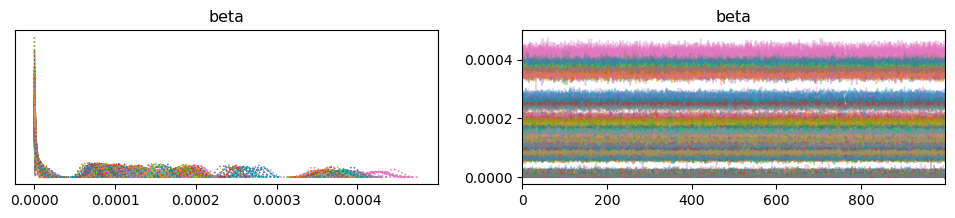

In [46]:
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag
az.plot_trace(idata,combined=True)

In [49]:
line_fit.rvalue

0.9987588800411147

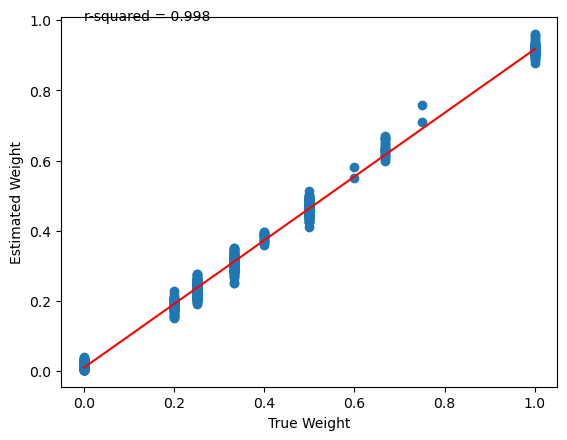

In [48]:
#Calculate relative proportions
mean_post = np.mean(idata.posterior['beta'][0],axis=0)

Nd = np.sum(mean_post, axis=1) 
Nd = np.asarray([Nd for i in range(n_clusts)]).T 

from scipy.stats import linregress
mean_post = np.divide(np.mean(idata.posterior['beta'][0],axis=0),Nd)

plt.scatter(np.ravel(prop_vec), np.ravel(mean_post))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

line_fit=linregress(np.ravel(prop_vec), np.ravel(mean_post))

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)
plt.annotate("r-squared = {:.3f}".format(line_fit.rvalue**2), (0, 1))
plt.show()

In [12]:
#Sample random rates from a uniform distribution for each class and each gene
rate_mat = np.zeros((n_clusts, n_genes))
rate_mat = np.random.uniform(low=rate_range[0], high=rate_range[1], size=(rate_mat.shape)).astype(int)
cell_rate_mat = np.repeat(rate_mat, int(n_cells/n_clusts), axis=0) #get the rates for each cell - n cells in each group with same rates
cell_rate_mat = np.vstack((cell_rate_mat, (np.repeat(np.reshape(cell_rate_mat[-1],(1,cell_rate_mat[-1].shape[0])), n_cells % n_clusts, axis=0)))) #Add any residual cells into the last cluster

#Sample from Poisson for each cell given its cell type
cell_counts = np.random.poisson(cell_rate_mat, size=cell_rate_mat.shape)

In [13]:
#Generate spots
orig_cells = np.arange(0,cell_counts.shape[0]) 
random.shuffle(orig_cells) #randomly shuffle indeces

#split into n spots
chunk_size = []

#loop over 100 group sizes
for f in range(1,100): 
    chunk_size = np.append(chunk_size, np.full(int(np.random.uniform((n_cells/20), (n_cells/10))), f)) #randomly sample the number of groups of size f - range is defined as n_cells/10 so that ~10 cells per group is max
    if sum(chunk_size) >= n_cells:
        break

chunk_size = chunk_size[np.cumsum(chunk_size) <= n_cells] #reduce groups to match number of cells
groups = np.split(orig_cells, np.cumsum(chunk_size).astype(int)) #group by chunk size
n_spots = len(groups)
if sum(groups[-1]) == 0: groups=groups[:-1] #Remove empty groups at end due to chunking residuals

if int(np.sum(chunk_size)) != n_cells:
    if int(np.sum(chunk_size) + len(groups[-1])) != n_cells:
        print('Grouping error - number of grouped cells /= number of total cells')

In [14]:
#Create simulated spots and calculate true proportions
spots = np.zeros((len(groups), cell_counts.shape[1])) #spots x genes
prop_vec = np.zeros((len(groups),n_clusts))

#loop over each group
for g in range(len(groups)):
    spots[g] = np.sum(cell_counts[groups[g]], axis=0) #generate mix of gene expression
    cell_vec = (groups[g]/int(n_cells/n_clusts)).astype(int) #vector of cell proportions
    cell_vec[np.where(cell_vec >= n_clusts)[0]] = n_clusts-1 #ensure all residual cells are grouped into the final cluster    
    prop_vec[g] = cdfn.proportions(cell_vec, n_clusts) #calculate the true proportions

In [15]:
#Calculate mean gene expression per group
curr = 0
ref_exp = np.zeros((n_clusts, n_genes))
for i in range(n_clusts):
    ref_exp[i] = np.mean(cell_counts[curr:curr+int(n_cells/n_clusts),:], axis=0)
    curr+=int(n_cells/n_clusts)

In [16]:
spots +=1 #remove any zeros

#Run without logs
basic_model=pm.Model()

with basic_model:
    
    # alpha=pm.MvNormal("alpha", mu=0, cov=np.ones((200,200)), shape=(200,50))
    beta=pm.HalfNormal("beta", sigma=1, shape=(n_spots, n_clusts))
    
    lmd=pm.math.dot(beta, ref_exp)    

    #Calculate total counts to get Poisson rates
    N = np.sum(spots, axis=1) 
    N = np.asarray([N for i in range(n_genes)]).T #Repeat total counts across columns for elementwise multiplication

    #Likelihood of observed data given Poisson rates
    y=pm.Poisson("y", mu=lmd*N, observed=spots)
    

In [17]:
with basic_model:
    idata=pm.sample(draws=1000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 406 seconds.


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

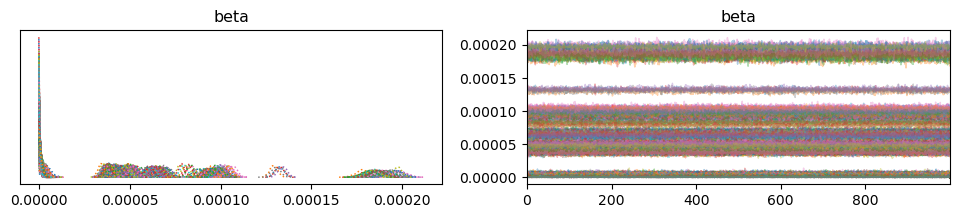

In [18]:
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag
az.plot_trace(idata,combined=True)

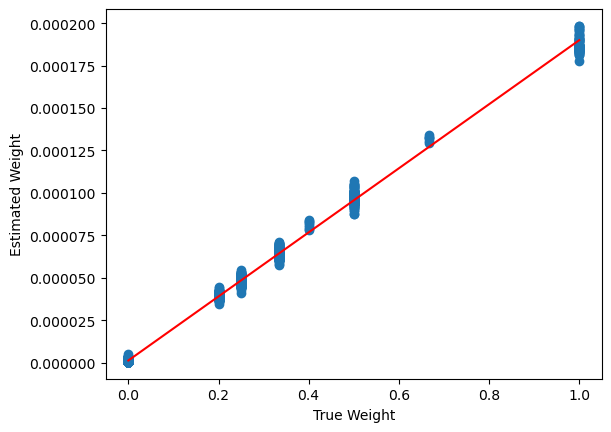

In [20]:
from scipy.stats import linregress
mean_post = np.mean(idata.posterior['beta'][0],axis=0)

plt.scatter(np.ravel(prop_vec), np.ravel(mean_post))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

line_fit=linregress(np.ravel(prop_vec), np.ravel(mean_post))

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)
plt.annotate("r-squared = {:.3f}".format(line_fit.rvalue**2), (0, 1))
plt.show()


In [5]:
#Define parameters of simulated data
n_clusts = 10
n_genes = 200
n_cells = 500

#Sample random rates from a uniform distribution for each class and each gene
rate_mat = np.zeros((n_clusts, n_genes))
rate_mat = np.random.uniform(low=0, high=50, size=(rate_mat.shape)).astype(int)
cell_rate_mat = np.repeat(rate_mat, int(n_cells/n_clusts), axis=0) #get the rates for each cell - n cells in each group with same rates

#Sample from Poisson for each cell given its cell type
cell_counts = np.random.poisson(cell_rate_mat, size=cell_rate_mat.shape)

In [7]:
#Generate spots
orig_cells = np.arange(0,cell_counts.shape[0]) 
random.seed(10)
random.shuffle(orig_cells) #randomly shuffle indeces

#split into n spots
chunk_size = []

for f in range(1,10):
    chunk_size = np.append(chunk_size, np.full(int(np.random.uniform(20, 60)), f)) #change random sample range to alter number of spots
    if sum(chunk_size) >= n_cells:
        break

chunk_size = chunk_size[np.cumsum(chunk_size) <= n_cells] #reduce groups to match number of cells
groups = np.split(orig_cells, np.append(np.cumsum(chunk_size), n_cells+1).astype(int))#group by chunk size
n_spots = len(groups)

In [8]:
#Create simulated spots and calculate true proportions
spots = np.zeros((len(groups), cell_counts.shape[1])) #spots x genes
prop_vec = np.zeros((len(groups),n_clusts))

#loop over each group
for g in range(len(groups)):
    spots[g] = np.sum(cell_counts[groups[g]], axis=0) #generate mix of gene expression
    prop_vec[g] = cdfn.proportions((groups[g]/int(n_cells/n_clusts)).astype(int), n_clusts) #calculate the true proportions

In [9]:
#Calculate mean gene expression per group
curr = 0
ref_exp = np.zeros((n_clusts, n_genes))
for i in range(n_clusts):
    ref_exp[i] = np.mean(cell_counts[curr:curr+int(n_cells/n_clusts),:], axis=0)
    curr+=int(n_cells/n_clusts)

In [10]:
#Run without logs
basic_model=pm.Model()

with basic_model:
    
    # alpha=pm.MvNormal("alpha", mu=0, cov=np.ones((200,200)), shape=(200,50))
    beta=pm.HalfNormal("beta", sigma=1, shape=(n_spots, n_clusts))
    
    lmd=pm.math.dot(beta, ref_exp)    

    #Calculate total counts to get Poisson rates
    N = np.sum(spots, axis=1) 
    N = np.asarray([N for i in range(n_genes)]).T #Repeat total counts across columns for elementwise multiplication

    #Likelihood of observed data given Poisson rates
    y=pm.Poisson("y", mu=lmd*N, observed=spots)
    

In [12]:
with basic_model:
    idata=pm.sample(draws=1000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 119 seconds.


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

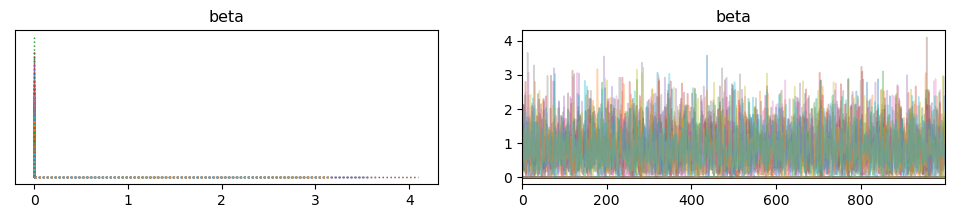

In [13]:
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag
az.plot_trace(idata,combined=True)

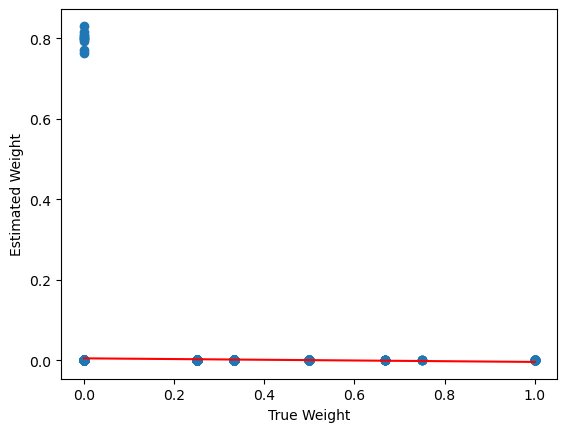

In [14]:
from scipy.stats import linregress
mean_post = np.mean(idata.posterior['beta'][0],axis=0)

plt.scatter(np.ravel(prop_vec), np.ravel(mean_post))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

line_fit=linregress(np.ravel(prop_vec), np.ravel(mean_post))

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)
plt.annotate("r-squared = {:.3f}".format(line_fit.rvalue**2), (0, 1))
plt.show()


In [19]:
def proportions(inp, n_clusts):
    props = np.zeros(n_clusts)
    prac = prac = np.unique(inp, return_counts=True)
    partial_props = prac[1]/sum(prac[1])
    count=0
    for o in range(len(props)):
        if o in prac[0]: 
            props[o] = partial_props[count]
            count+=1
    return(props)

In [25]:
n_clusts = 10
n_genes = 200 #TICK
n_cells = 600

#Sample random rates from a uniform distribution for each class and each gene
rate_mat = np.zeros((n_clusts, n_genes)) 
rate_mat = np.random.uniform(low=0, high=50, size=(rate_mat.shape)).astype(int) #TICK.
cell_rate_mat = np.repeat(rate_mat, 60, axis=0) #get the rates for each cell - 60 cells in each group with same rates #?

#Sample from Poisson for each cell given its cell type
cell_counts = np.random.poisson(cell_rate_mat, size=cell_rate_mat.shape)


In [51]:
#Generate spots
n_spots = 180

orig_cells = np.arange(0,cell_counts.shape[0]) 
#random.seed(10)
random.shuffle(orig_cells) #randomly shuffle indeces

#Define partioning - split into different groups of varying sizes
chunk_size = [np.ones(50), np.full(20, 2), np.full(27, 3), np.full(1, 4), np.full(61, 5), np.full(20,6)]
groups = np.split(orig_cells, np.cumsum(np.concatenate(chunk_size)).astype(int)) #group by chunk size


In [52]:
groups

[array([341]),
 array([538]),
 array([410]),
 array([490]),
 array([270]),
 array([4]),
 array([186]),
 array([317]),
 array([379]),
 array([144]),
 array([210]),
 array([461]),
 array([420]),
 array([117]),
 array([593]),
 array([289]),
 array([540]),
 array([586]),
 array([283]),
 array([198]),
 array([297]),
 array([372]),
 array([536]),
 array([159]),
 array([321]),
 array([427]),
 array([356]),
 array([589]),
 array([145]),
 array([546]),
 array([116]),
 array([257]),
 array([386]),
 array([1]),
 array([352]),
 array([201]),
 array([254]),
 array([407]),
 array([150]),
 array([369]),
 array([404]),
 array([533]),
 array([0]),
 array([590]),
 array([376]),
 array([45]),
 array([363]),
 array([58]),
 array([518]),
 array([351]),
 array([111, 131]),
 array([599, 280]),
 array([173, 308]),
 array([299, 245]),
 array([ 16, 276]),
 array([394, 564]),
 array([174,  54]),
 array([385, 358]),
 array([284, 102]),
 array([ 69, 466]),
 array([296, 154]),
 array([327, 428]),
 array([90, 14]),


In [42]:
len(groups)

179

In [53]:
#Create simulated spots and calculate true proportions
spots = np.zeros((len(groups), cell_counts.shape[1])) #spots x genes
prop_vec = np.zeros((len(groups),n_clusts))

#loop over each group
for g in range(len(groups)):
    spots[g] = np.sum(cell_counts[groups[g]], axis=0) #generate mix of gene expression
    prop_vec[g] = proportions((groups[g]/60).astype(int), n_clusts) #calculate the true proportions

In [54]:
#Calculate mean gene expression per group
curr = 0
ref_exp = np.zeros((n_clusts, n_genes))
for i in range(n_clusts):
    ref_exp[i] = np.mean(cell_counts[curr:curr+60,:], axis=0)
    curr+=60

In [55]:
ref_exp.shape

(10, 200)

In [57]:
spots

array([[  4.,  11.,  38., ...,  46.,   7.,   4.],
       [ 24.,  14.,   0., ...,  24.,  40.,  39.],
       [ 29.,  20.,   1., ...,   4.,  39.,  30.],
       ...,
       [149., 166., 111., ..., 171., 148., 130.],
       [ 87., 122., 118., ..., 104., 134., 155.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [67]:
#Run without logs
basic_model=pm.Model()

with basic_model:
    
    # alpha=pm.MvNormal("alpha", mu=0, cov=np.ones((200,200)), shape=(200,50))
    beta=pm.HalfNormal("beta", sigma=1, shape=(n_spots, n_clusts))
    
    lmd=pm.math.dot(beta, ref_exp)    

    #Calculate total counts to get Poisson rates
    N = np.sum(spots+1, axis=1) 
    N = np.asarray([N for i in range(n_genes)]).T #Repeat total counts across columns for elementwise multiplication

    #Likelihood of observed data given Poisson rates
    y=pm.Poisson("y", mu=lmd*N, observed=spots+1)
    

In [62]:
spots + 1

array([[  5.,  12.,  39., ...,  47.,   8.,   5.],
       [ 25.,  15.,   1., ...,  25.,  41.,  40.],
       [ 30.,  21.,   2., ...,   5.,  40.,  31.],
       ...,
       [150., 167., 112., ..., 172., 149., 131.],
       [ 88., 123., 119., ..., 105., 135., 156.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.]])

In [68]:
with basic_model:
    idata=pm.sample(draws=1000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 104 seconds.


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

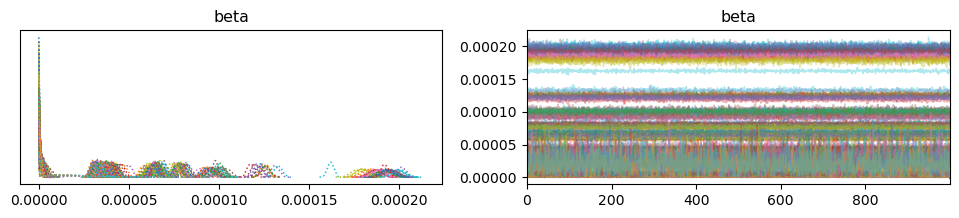

In [69]:
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag
az.plot_trace(idata,combined=True)

In [71]:
prop_vec[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [75]:
np.mean(idata.posterior['beta'][0],axis=0)[-1]*1000

<xarray.DataArray 'beta' (beta_dim_1: 10)>
array([0.0218111 , 0.0195246 , 0.02094023, 0.01950591, 0.02312866,
       0.02169964, 0.02381533, 0.02192149, 0.01945598, 0.02131271])
Coordinates:
    chain       int64 0
    beta_dim_0  int64 179
  * beta_dim_1  (beta_dim_1) int64 0 1 2 3 4 5 6 7 8 9

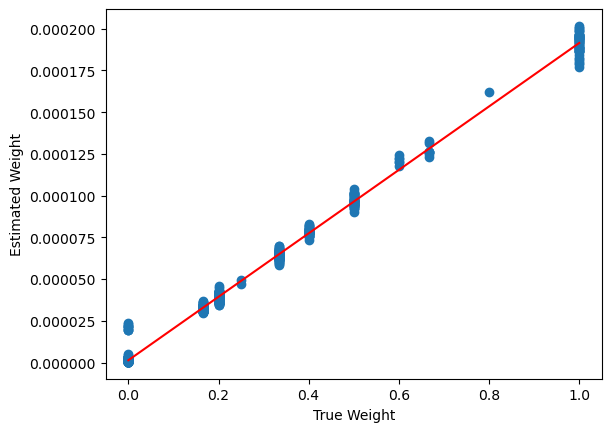

In [70]:
from scipy.stats import linregress
mean_post = np.mean(idata.posterior['beta'][0],axis=0)

plt.scatter(np.ravel(prop_vec), np.ravel(mean_post))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

line_fit=linregress(np.ravel(prop_vec), np.ravel(mean_post))

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)
plt.annotate("r-squared = {:.3f}".format(line_fit.rvalue**2), (0, 1))
plt.show()


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

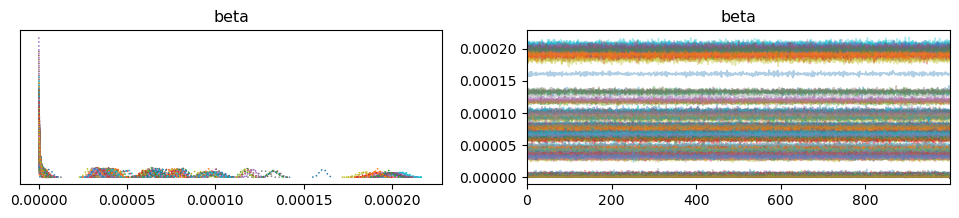

In [49]:
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag
az.plot_trace(idata,combined=True)

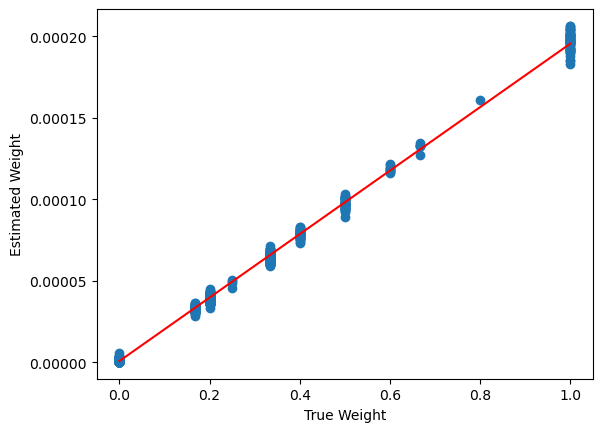

In [50]:
from scipy.stats import linregress
mean_post = np.mean(idata.posterior['beta'][0],axis=0)

plt.scatter(np.ravel(prop_vec), np.ravel(mean_post))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

line_fit=linregress(np.ravel(prop_vec), np.ravel(mean_post))

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)
plt.annotate("r-squared = {:.3f}".format(line_fit.rvalue**2), (0, 1))
plt.show()


In [20]:
#Create simulated spots and calculate true proportions
spots = np.zeros((len(groups), cell_counts.shape[1])) #spots x genes
prop_vec = np.zeros((len(groups),n_clusts))

#loop over each group
for g in range(len(groups)):
    spots[g] = np.sum(cell_counts[groups[g]], axis=0) #generate mix of gene expression
    prop_vec[g] = proportions((groups[g]/60).astype(int), n_clusts) #calculate the true proportions

In [ ]:
#Run without logs
basic_model=pm.Model()

with basic_model:
    
    # alpha=pm.MvNormal("alpha", mu=0, cov=np.ones((200,200)), shape=(200,50))
    beta=pm.HalfNormal("beta", sigma=1, shape=(n_spots, n_clusts))
    
    lmd=pm.math.dot(beta, ref_exp)    

    #Calculate total counts to get Poisson rates
    N = np.sum(spots, axis=1) 
    N = np.asarray([N for i in range(n_genes)]).T #Repeat total counts across columns for elementwise multiplication

    #Likelihood of observed data given Poisson rates
    y=pm.Poisson("y", mu=lmd*N, observed=spots)
    

In [18]:
#Calculate mean gene expression per group
curr = 0
ref_exp = np.zeros((n_clusts, n_genes))
for i in range(n_clusts):
    ref_exp[i] = np.mean(cell_counts[curr:curr+60,:], axis=0)
    curr+=60

In [36]:
#Run without logs
basic_model=pm.Model()

with basic_model:
    
    # alpha=pm.MvNormal("alpha", mu=0, cov=np.ones((200,200)), shape=(200,50))
    beta=pm.HalfNormal("beta", sigma=1, shape=(n_spots, n_clusts))
    
    lmd=pm.math.dot(beta, ref_exp)    

    #Calculate total counts to get Poisson rates
    N = np.sum(spots, axis=1) 
    N = np.asarray([N for i in range(n_genes)]).T #Repeat total counts across columns for elementwise multiplication

    #Likelihood of observed data given Poisson rates
    y=pm.Poisson("y", mu=lmd*N, observed=spots)
    

In [8]:
basic_model

beta ~ N**+(0, 1)
   y ~ Pois(f(beta))

In [37]:
with basic_model:
    idata=pm.sample(draws=1000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 324 seconds.


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

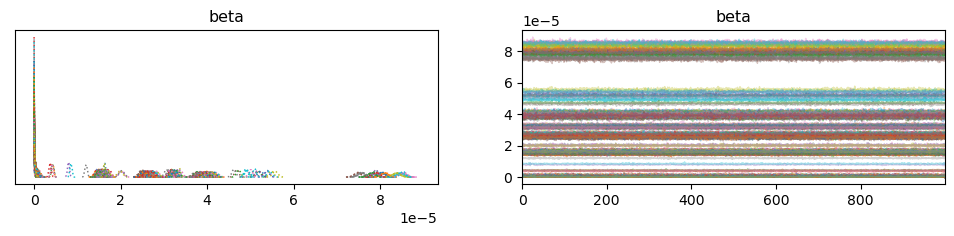

In [38]:
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag
az.plot_trace(idata,combined=True)

In [16]:
8*1e-5

8e-05

In [39]:
mean_post = np.mean(idata.posterior['beta'][0],axis=0)

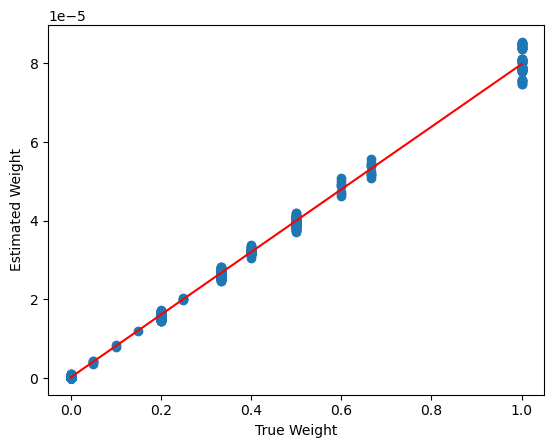

In [40]:
plt.scatter(np.ravel(prop_vec), np.ravel(mean_post))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

line_fit=scp.stats.linregress(np.ravel(prop_vec), np.ravel(mean_post))

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)
plt.annotate("r-squared = {:.3f}".format(line_fit.rvalue**2), (0, 1))
plt.show()


In [43]:
mean_beta

<xarray.DataArray 'beta' (beta_dim_0: 200, beta_dim_1: 10)>
array([[7.70537829e-05, 1.26001026e-07, 1.83178577e-07, ...,
        3.26455128e-07, 2.23969149e-07, 3.64569135e-07],
       [1.68193047e-07, 1.55447327e-07, 1.51181311e-07, ...,
        1.64776981e-07, 1.64286212e-07, 1.84377643e-07],
       [1.79176055e-07, 1.89860413e-07, 2.05494372e-07, ...,
        2.11882049e-07, 2.67728489e-07, 1.76008536e-07],
       ...,
       [2.94076836e-07, 7.20435383e-07, 1.61837132e-05, ...,
        1.57934425e-05, 3.31787100e-07, 1.83227078e-07],
       [1.95094809e-07, 3.76328825e-07, 1.50349510e-05, ...,
        1.60030801e-05, 2.78282090e-07, 2.78640627e-07],
       [1.59284945e-05, 4.27661269e-06, 4.09232761e-06, ...,
        1.23457777e-05, 1.62674852e-05, 8.21780133e-06]])
Coordinates:
    chain       int64 0
  * beta_dim_0  (beta_dim_0) int64 0 1 2 3 4 5 6 ... 193 194 195 196 197 198 199
  * beta_dim_1  (beta_dim_1) int64 0 1 2 3 4 5 6 7 8 9

In [53]:
mean_beta = np.mean(chain1,axis=0)
mean_beta.shape

(200, 10)

In [35]:
prop_vec.shape

(200, 10)

In [21]:
plt.scatter(np.ravel(prop_vec), np.ravel(mean_beta))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

NameError: name 'mean_beta' is not defined

In [ ]:
plt.scatter(np.ravel(tw_arr), np.ravel(normalized_mean_beta))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

line_fit=scp.linregress(np.ravel(tw_arr), np.ravel(normalized_mean_beta))

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)
plt.annotate("r-squared = {:.3f}".format(line_fit.rvalue**2), (0, 1))
plt.show()


In [32]:
mean_beta.shape

(200, 10)

In [6]:
import scipy.stats as scp

In [7]:
orig_counts=pd.read_csv("original_counts.csv")
ref=pd.read_csv("reference.csv")
metadata=pd.read_csv("simulated_metadata.csv")
spots=pd.read_csv("simulated_spots.csv")

In [8]:
spots["gene"][spots["gene"]=="NKG7"]

14    NKG7
Name: gene, dtype: object

In [9]:
rates = np.asarray(spots)[:,1:]/np.sum(np.asarray(spots)[:,1:], axis=0)

In [10]:
rates=rates*1e4

#log_rate=np.log(rates.astype('float64'))



In [11]:
#plt.hist(log_rate[14,:], bins = 100)
#plt.show()

In [12]:
ref = np.asarray(ref)*1e4

In [13]:
pd.DataFrame(ref)

,0,1,2,3,4,5,6,7,8
0,253.164557,729.166667,169.491525,145.348837,143.369176,864.197531,0.000000,312.5,407857.142857
1,6455.696203,462583.333333,8199.152542,6250.000000,5770.609319,109135.802469,5625.000000,673125.0,20000.000000
2,1533.052039,312020.833333,1970.338983,1569.767442,1648.745520,45432.098765,1388.888889,52500.0,7857.142857
3,84.388186,41.666667,148.305085,19854.651163,71.684588,1543.209877,138.888889,625.0,714.285714
4,1054.852321,1729.166667,1355.932203,843.023256,36881.720430,1358.024691,201944.444444,2500.0,714.285714
...,...,...,...,...,...,...,...,...,...
495,98.452883,479.166667,127.118644,58.139535,179.211470,1543.209877,277.777778,625.0,0.000000
496,506.329114,708.333333,487.288136,1569.767442,501.792115,1049.382716,416.666667,1562.5,0.000000
497,2869.198312,44000.000000,4216.101695,3808.139535,4480.286738,21790.123457,10694.444444,75625.0,9285.714286
498,42.194093,270.833333,254.237288,406.976744,35.842294,123.456790,0.000000,0.0,0.000000


In [14]:
pd.DataFrame(rates)

,0,1,2,3,4,5,6,7,8,9,...,835,836,837,838,839,840,841,842,843,844
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93.457944,375.93985,0.0,736.196319,746.812386,635.294118,458.715596,106.382979,671.378092,0.0,...,888.888889,813.953488,1108.033241,63.291139,64.102564,123.45679,0.0,95.541401,0.0,81.967213
2,0.0,0.0,0.0,613.496933,346.083789,352.941176,114.678899,53.191489,459.363958,0.0,...,511.111111,581.395349,1246.537396,0.0,0.0,0.0,0.0,159.235669,0.0,40.983607
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,581.395349,122.699387,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.983607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,22.93578,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,75.18797,0.0,30.674847,109.289617,47.058824,114.678899,53.191489,70.671378,68.027211,...,133.333333,0.0,55.401662,63.291139,0.0,123.45679,0.0,63.694268,137.931034,40.983607
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
ref.shape, rates.shape

((500, 9), (500, 845))

In [16]:
rates=rates.astype('float64')
ref=ref.astype('float64')

In [39]:
ncell=50
basic_model=pm.Model()

with basic_model:
    #alpha=pm.Normal("alpha", mu=0, sigma=1, shape=ncell)
    beta=pm.HalfNormal("beta",sigma=1, shape=(9, ncell))
    
    mu= pm.math.dot(ref, beta)
    
    y=pm.Poisson("y", mu, observed=rates[:,0:ncell])
    

In [40]:
ref.shape


(500, 9)

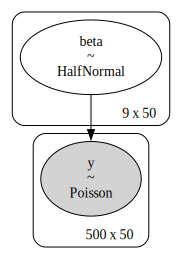

In [41]:
pm.model_to_graphviz(basic_model)

In [ ]:
with basic_model:
    idata=pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta]


In [ ]:
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag
az.plot_trace(idata,combined=True)

In [ ]:
true_weights=pd.read_csv("true_weights.csv").iloc[:,0:ncell+1]

In [ ]:
true_weights

In [ ]:
chain1 = idata.posterior["beta"][0]
chain1.shape

In [ ]:
chain1=np.mean(chain1,axis=0)

In [ ]:
chain2 = idata.posterior["beta"][1]
chain2=np.mean(chain2,axis=0)

In [ ]:
mean_beta=chain1+chain2

In [ ]:
pd.DataFrame(mean_beta)

In [ ]:
normalized_mean_beta=np.asarray(mean_beta)/np.sum(np.asarray(mean_beta), axis=0)

In [ ]:
pd.DataFrame(normalized_mean_beta)


In [ ]:
true_weights.shape, normalized_mean_beta.shape

In [ ]:
true_weights

In [ ]:
tw_arr = np.asarray(true_weights)[:,1:]
tw_arr.shape, normalized_mean_beta.shape

In [ ]:
plt.scatter(np.ravel(tw_arr), np.ravel(normalized_mean_beta))
plt.xlabel("True Weight")
plt.ylabel("Estimated Weight")

line_fit=scp.linregress(np.ravel(tw_arr), np.ravel(normalized_mean_beta))

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1, num=100)

# Plot regression line
plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)
plt.annotate("r-squared = {:.3f}".format(line_fit.rvalue**2), (0, 1))
plt.show()


In [ ]:
plt.plot(np.sum((tw_arr-normalized_mean_beta)**2, axis=0))
plt.show()